# Exploración de Datasets de OpenML

Este notebook explora y analiza datasets de OpenML para el proyecto de meta-learning.


In [1]:
import sys
import os
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data_loader import load_openml_dataset, search_openml_datasets
from meta_features import extract_meta_features_batch

# Configuración
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

import inspect

#print(inspect.getsource(search_openml_datasets))



Could not download file from https://openml.org/datasets/0000/0002/dataset_2.pq: HTTPSConnectionPool(host='www.openml.org', port=443): Max retries exceeded with url: https://www.openml.org/datasets/0000/0002/dataset_2.pq (Caused by ResponseError('too many redirects'))
Failed to download parquet, fallback on ARFF.


percentage_n_a    0.649836
dtype: float64


## 1. Búsqueda de Datasets


In [2]:
# Buscar datasets de clasificación
classification_datasets = search_openml_datasets(
    task_type='Supervised Classification',
    n_samples_min=100,
    n_samples_max=5000,
    n_features_max=50
)

print(f"Encontrados {len(classification_datasets)} datasets")
classification_datasets.head()


TaskType.SUPERVISED_CLASSIFICATION
Encontrados 2217 datasets


/home/jabel/Documentos/GIthub_repo/MetaLearning/venv/lib/python3.12/site-packages/openml/tasks/functions.py:235: RuntimeWarning: Invalid xml for task 362155: 0
From {'oml:task_id': '362155', 'oml:task_type_id': '1', 'oml:task_type': 'Supervised Classification', 'oml:did': '31', 'oml:name': 'credit-g', 'oml:status': 'active', 'oml:format': 'ARFF', 'oml:input': [{'@name': 'estimation_procedure', '#text': '0'}, {'@name': 'source_data', '#text': '31'}, {'@name': 'target_feature', '#text': 'classification problem'}], 'oml:quality': [{'@name': 'MajorityClassSize', '#text': '700.0'}, {'@name': 'MaxNominalAttDistinctValues', '#text': '10.0'}, {'@name': 'MinorityClassSize', '#text': '300.0'}, {'@name': 'NumberOfClasses', '#text': '2.0'}, {'@name': 'NumberOfFeatures', '#text': '21.0'}, {'@name': 'NumberOfInstances', '#text': '1000.0'}, {'@name': 'NumberOfInstancesWithMissingValues', '#text': '0.0'}, {'@name': 'NumberOfMissingValues', '#text': '0.0'}, {'@name': 'NumberOfNumericFeatures', '#text':

,tid,ttid,did,name,task_type,status,estimation_procedure,evaluation_measures,source_data,target_feature,...,MaxNominalAttDistinctValues,MinorityClassSize,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures,cost_matrix
2,2,TaskType.SUPERVISED_CLASSIFICATION,2,anneal,Supervised Classification,active,10-fold Crossvalidation,predictive_accuracy,2,class,...,7.0,8.0,5.0,39.0,898.0,898.0,22175.0,6.0,33.0,NaN
3,3,TaskType.SUPERVISED_CLASSIFICATION,3,kr-vs-kp,Supervised Classification,active,10-fold Crossvalidation,NaN,3,class,...,3.0,1527.0,2.0,37.0,3196.0,0.0,0.0,0.0,37.0,NaN
8,8,TaskType.SUPERVISED_CLASSIFICATION,8,liver-disorders,Supervised Classification,active,10-fold Crossvalidation,predictive_accuracy,8,selector,...,NaN,NaN,0.0,6.0,345.0,0.0,0.0,6.0,0.0,NaN
9,9,TaskType.SUPERVISED_CLASSIFICATION,9,autos,Supervised Classification,active,10-fold Crossvalidation,predictive_accuracy,9,symboling,...,22.0,3.0,6.0,26.0,205.0,46.0,59.0,15.0,11.0,NaN
10,10,TaskType.SUPERVISED_CLASSIFICATION,10,lymph,Supervised Classification,active,10-fold Crossvalidation,predictive_accuracy,10,class,...,8.0,2.0,4.0,19.0,148.0,0.0,0.0,3.0,16.0,NaN


## 2. Cargar Datasets de Ejemplo


In [3]:
# Cargar algunos datasets populares de OpenML
# Iris (ID: 61), Wine (ID: 187), Breast Cancer (ID: 13)
dataset_ids = [61, 187, 13]

datasets = []
for dataset_id in dataset_ids:
    print(f"Cargando dataset {dataset_id}...")
    dataset = load_openml_dataset(dataset_id)
    if dataset:
        datasets.append(dataset)
        print(f"  - {dataset['name']}: {dataset['metadata']['n_samples']} muestras, {dataset['metadata']['n_features']} características")

print(f"\nTotal de datasets cargados: {len(datasets)}")


Cargando dataset 61...


  - iris: 150 muestras, 4 características
Cargando dataset 187...


  - wine: 178 muestras, 13 características
Cargando dataset 13...


  - breast-cancer: 286 muestras, 9 características

Total de datasets cargados: 3


## 3. Extraer Características Meta


In [5]:
# Extraer características meta de todos los datasets
from meta_features import extract_meta_features_batch

datasets_df = pd.DataFrame([
    {"dataset_id": d["id"], "name": d["name"]} for d in datasets
])

meta_features_df = extract_meta_features_batch(datasets_df)
meta_features_df


,instance_count,log_instance_count,number_of_classes,number_of_features,log_number_of_features,percentage_missing_values,percentage_of_instances_with_missing_values,percentage_of_features_with_missing_values,percentage_of_categorical_columns_with_missing_values,percentage_of_categorical_values_with_missing_values,...,skewness_mean,skewness_std,skewness_min,skewness_max,kurtosis_mean,kurtosis_std,kurtosis_min,kurtosis_max,percentage_n_a,dataset_id
0,150.0,5.010635,3.0,4.0,1.386294,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.067376,0.264082,-0.274464,0.334053,-0.750739,0.688334,-1.401921,0.290781,0.000000,61.0
1,178.0,5.181784,3.0,13.0,2.564949,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.350168,0.454820,-0.307285,1.098191,0.006743,0.898137,-1.086435,2.104991,0.000000,187.0
2,286.0,5.655992,2.0,9.0,2.197225,0.003497,0.031469,0.222222,0.222222,0.003497,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003497,13.0


## 4. Visualización de Características Meta


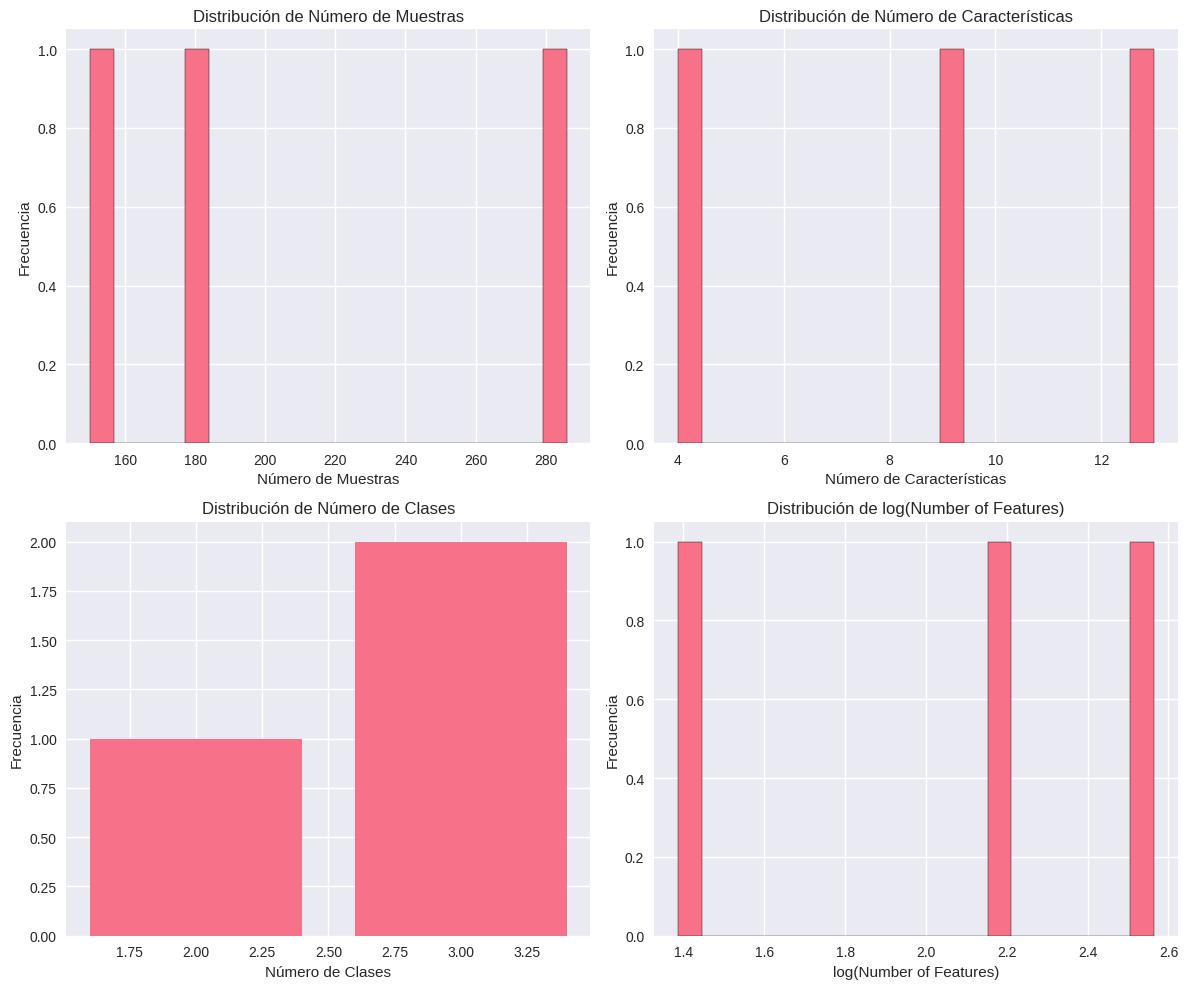

In [10]:
# Visualizar distribución de características
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

if 'instance_count' in meta_features_df.columns:
    axes[0, 0].hist(meta_features_df['instance_count'], bins=20, edgecolor='black')
    axes[0, 0].set_title('Distribución de Número de Muestras')
    axes[0, 0].set_xlabel('Número de Muestras')
    axes[0, 0].set_ylabel('Frecuencia')

if 'number_of_features' in meta_features_df.columns:
    axes[0, 1].hist(meta_features_df['number_of_features'], bins=20, edgecolor='black')
    axes[0, 1].set_title('Distribución de Número de Características')
    axes[0, 1].set_xlabel('Número de Características')
    axes[0, 1].set_ylabel('Frecuencia')

if 'number_of_classes' in meta_features_df.columns:
    axes[1, 0].bar(meta_features_df['number_of_classes'].value_counts().index, 
                   meta_features_df['number_of_classes'].value_counts().values)
    axes[1, 0].set_title('Distribución de Número de Clases')
    axes[1, 0].set_xlabel('Número de Clases')
    axes[1, 0].set_ylabel('Frecuencia')

if 'log_number_of_features' in meta_features_df.columns:
    axes[1, 1].hist(meta_features_df['log_number_of_features'], bins=20, edgecolor='black')
    axes[1, 1].set_title('Distribución de log(Number of Features)')
    axes[1, 1].set_xlabel('log(Number of Features)')
    axes[1, 1].set_ylabel('Frecuencia')


plt.tight_layout()
plt.show()


## 5. Análisis de Correlaciones


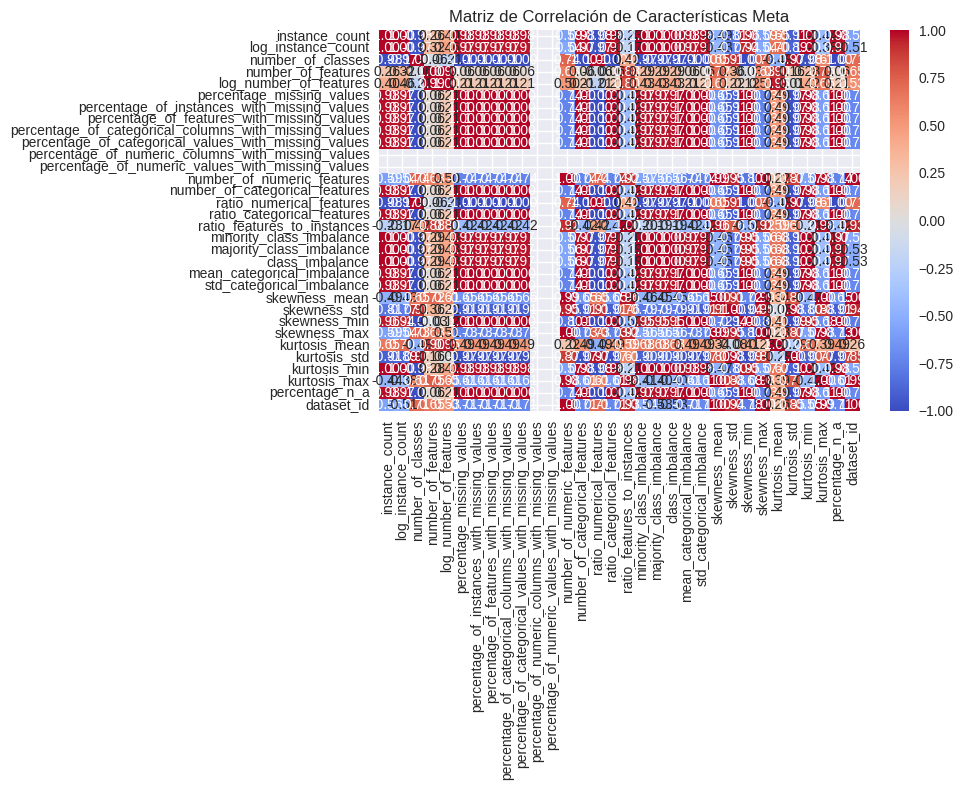

In [11]:
# Matriz de correlación entre características meta
numeric_cols = meta_features_df.select_dtypes(include=[np.number]).columns
corr_matrix = meta_features_df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Matriz de Correlación de Características Meta')
plt.tight_layout()
plt.show()
